In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("Global_Temperature.csv")
df_original = df.copy()
print(df.shape[0])
df.head()

239177


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
df['dt'] = pd.to_datetime(df['dt'])
month_value = df['dt'].dt.month
year_value = df['dt'].dt.year
df.insert(loc = 0, column='Month', value = month_value)
df.insert(loc = 1, column='Year', value = year_value)
df = df.drop('dt', axis=1)
df.head()

,Month,Year,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1,1849,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,2,1849,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,3,1849,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,4,1849,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,5,1849,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df = df.drop('Latitude', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('AverageTemperatureUncertainty', axis=1)
df.head()

,Month,Year,AverageTemperature,City,Country
0,1,1849,26.704,Abidjan,Côte D'Ivoire
1,2,1849,27.434,Abidjan,Côte D'Ivoire
2,3,1849,28.101,Abidjan,Côte D'Ivoire
3,4,1849,26.140,Abidjan,Côte D'Ivoire
4,5,1849,25.427,Abidjan,Côte D'Ivoire


In [5]:
df.isnull().sum()

Month                     0
Year                      0
AverageTemperature    11002
City                      0
Country                   0
dtype: int64

In [6]:
df = df.dropna(subset=['AverageTemperature'])
df.isnull().sum()

Month                 0
Year                  0
AverageTemperature    0
City                  0
Country               0
dtype: int64

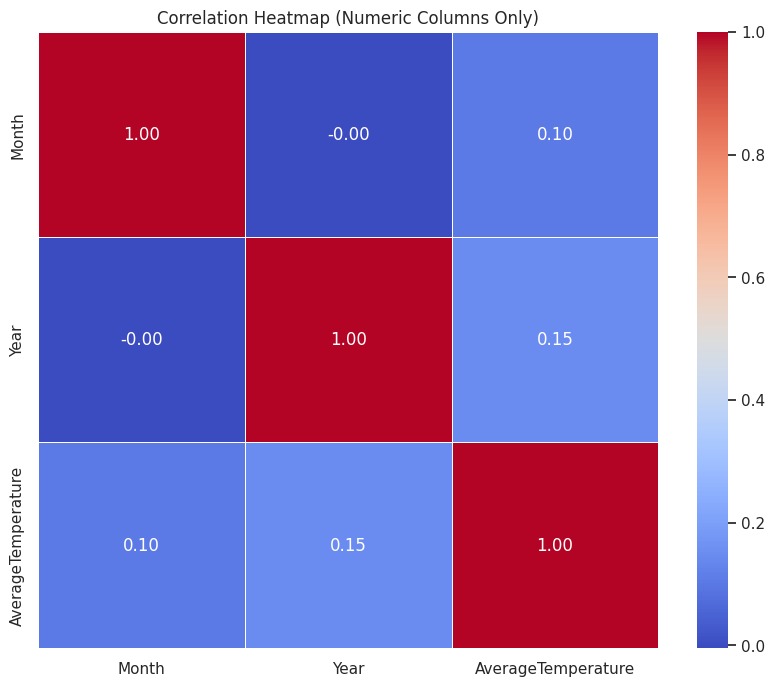

In [7]:
numerical_columns = df[['Month', 'Year', 'AverageTemperature']]
correlation_matrix = numerical_columns.corr()

sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

In [8]:
data_scale = df[['Month', 'Year']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_scale)
df['Month'] = scaled_data[:, 0]
df['Year'] = scaled_data[:, 1]
df.head()

,Month,Year,AverageTemperature,City,Country
0,0.000000,0.392593,26.704,Abidjan,Côte D'Ivoire
1,0.090909,0.392593,27.434,Abidjan,Côte D'Ivoire
2,0.181818,0.392593,28.101,Abidjan,Côte D'Ivoire
3,0.272727,0.392593,26.140,Abidjan,Côte D'Ivoire
4,0.363636,0.392593,25.427,Abidjan,Côte D'Ivoire


In [9]:
features_list = df[['Month', 'Year', 'City']]
features_list = pd.get_dummies(features_list)
target = df['AverageTemperature']
x_train, x_test, y_train, y_test = train_test_split(features_list, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
prediction_result = model.predict(x_test)
ma_error = mean_absolute_error(y_test, prediction_result)
ms_error = mean_squared_error(y_test, prediction_result)
r2 = r2_score(y_test, prediction_result)


print(f'Mean Absolute Error: {ma_error}')
print(f'Mean Squared Error: {ms_error}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.8932141553632081
Mean Squared Error: 1.6937770460965704
R-squared: 0.9833255719137538


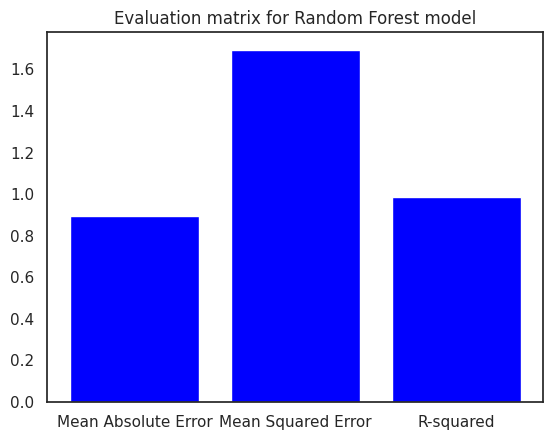

In [10]:
values = [ma_error, ms_error, r2]
indices = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
plt.bar(indices, values, color='blue')
plt.title('Evaluation matrix for Random Forest model')
plt.show()

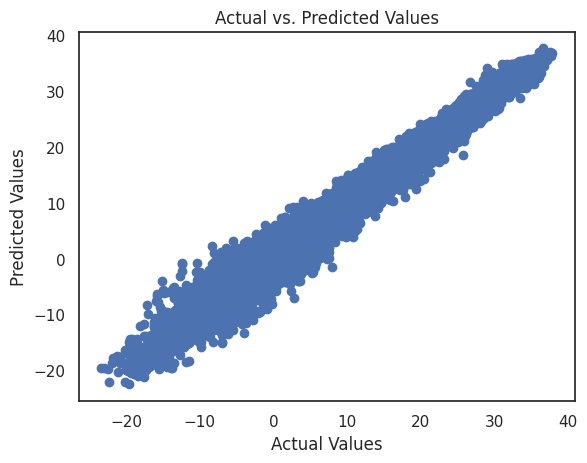

In [11]:
plt.scatter(y_test, prediction_result)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

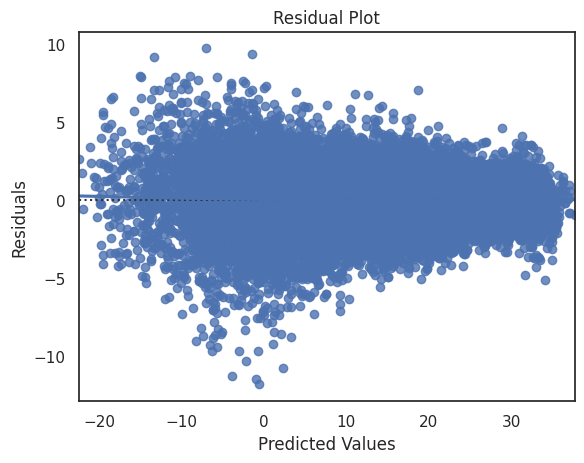

In [12]:
residuals = y_test - prediction_result
sns.residplot(x=prediction_result, y=residuals, lowess=True)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

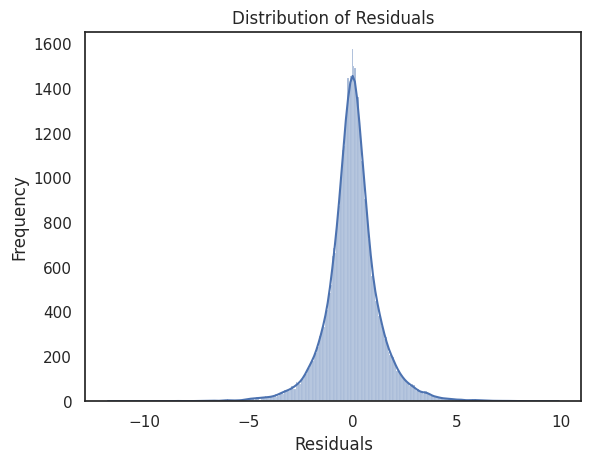

In [13]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [38]:
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
x = df[['Month', 'Year', 'City']]
y = df['AverageTemperature']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"R-squared Error : {r2_score}")

Mean Absolute Error : 1.1256455428753058
Mean Squared Error : 2.292320305533239
R-squared Error : 0.977433198676683


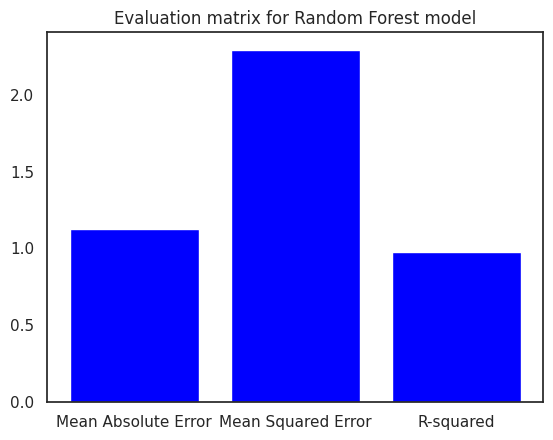

In [39]:
values = [mae, mse, r2_score]
indices = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
plt.bar(indices, values, color='blue')
plt.title('Evaluation matrix for Random Forest model')
plt.show()

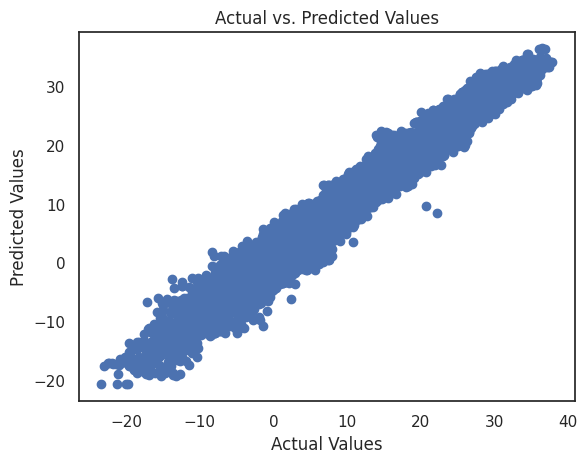

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

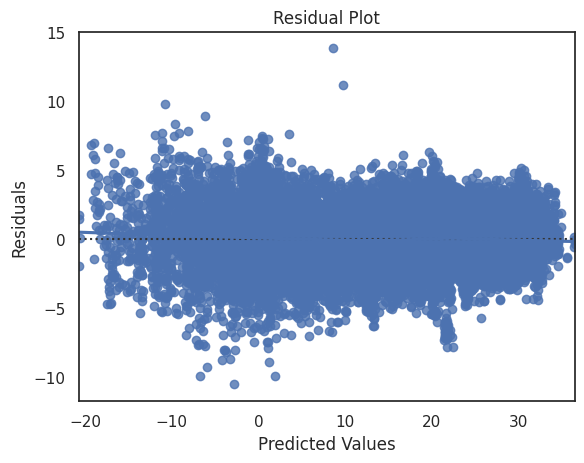

In [41]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

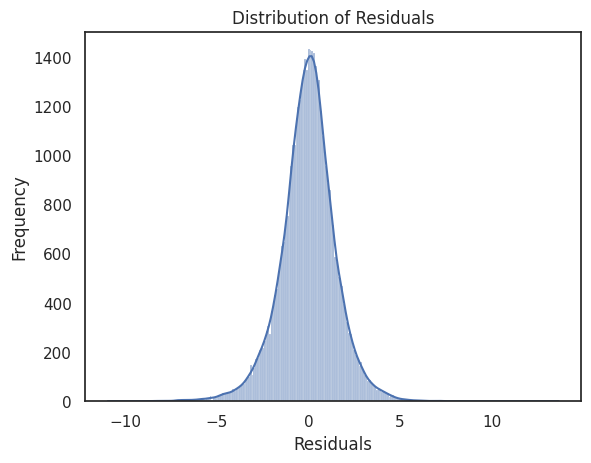

In [42]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

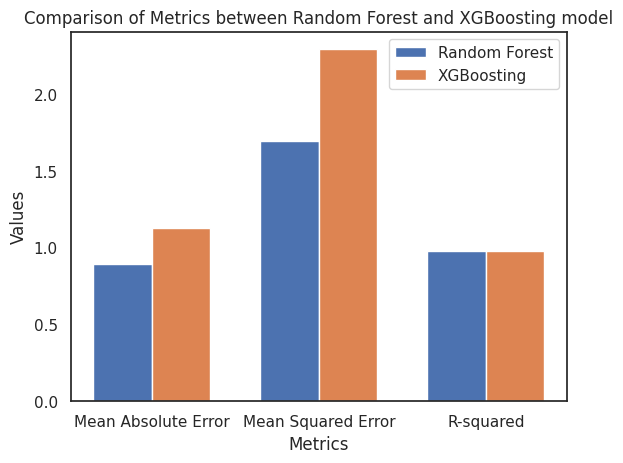

In [45]:
names = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
v1 = [ma_error, ms_error, r2]
v2 = [mae, mse, r2_score]

bar_width = 0.35
index = np.arange(len(names))
plt.bar(index, v1, bar_width, label='Random Forest')
plt.bar(index + bar_width, v2, bar_width, label='XGBoosting')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics between Random Forest and XGBoosting model')
plt.xticks(index + bar_width / 2, metrics_names)
plt.legend()
plt.show()